<a href="https://colab.research.google.com/github/anaazzahra/MINPRO3_Predict-Customer-Personality-to-boost-marketing-campaign-by-using-Machine-Learning/blob/main/Mini_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MINI PROJECT KE-3 (Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning)

BY ANA AZZAHRA

In [1]:
#Import Library
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Connecting to data source
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load data
df = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/DS JAP/miniproject/minpro3/marketing_campaign_data.csv')

In [4]:
#checking sample data
df.sample(10)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2006,2006,3599,1970,S1,Menikah,63684000.0,0,1,26-11-2012,61,...,5,0,0,0,0,0,0,3,11,0
866,866,115,1966,S2,Lajang,43456000.0,0,1,26-03-2013,0,...,5,0,0,0,0,0,0,3,11,0
928,928,10037,1993,S1,Lajang,74293000.0,0,0,04-05-2014,66,...,2,0,0,0,0,0,0,3,11,0
1973,1973,9507,1975,S1,Menikah,40794000.0,0,1,07-04-2013,18,...,7,0,0,0,0,0,0,3,11,0
2053,2053,10509,1955,S2,Lajang,36927000.0,1,1,02-06-2014,46,...,8,0,0,0,0,0,0,3,11,0
365,365,10704,1969,S1,Lajang,54803000.0,0,1,21-08-2012,65,...,4,0,0,0,0,0,0,3,11,0
982,982,6634,1979,S2,Cerai,33462000.0,1,0,07-08-2013,78,...,7,0,0,0,0,0,0,3,11,0
571,571,3526,1968,S3,Menikah,38443000.0,1,1,27-01-2014,58,...,7,0,0,0,0,0,0,3,11,0
633,633,4376,1960,D3,Lajang,32218000.0,0,0,15-02-2014,27,...,7,1,0,0,0,0,0,3,11,1
1984,1984,1406,1975,S1,Lajang,53201000.0,1,1,12-02-2013,49,...,7,0,0,0,0,0,0,3,11,0


# **EXPLORATORY DATA ANALYSIS**

# **Descriptive Statistics**

In [5]:
#Checking data info to ensure type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

Notes:

- there has been data that does not match the type, namely Dt_Customer

In [6]:
#Changing Dt_Customer's data type from object to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
print(df['Dt_Customer'])

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]


In [7]:
#Deleting Unnamed column due to will not be used.
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
#Checking descriptive statistical value of data
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,2013-01-16 00:00:00,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,2013-07-08 12:00:00,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,2013-12-30 06:00:00,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,NaN,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


# **Univariate Analysis**

**Numerical Feature**

In [9]:
#Data clasification based on the type
nums = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',	'MntCoke', 'MntFruits',	'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
         'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
cats = ['Education', 'Marital_Status']
timestamp =['Dt_Customer']

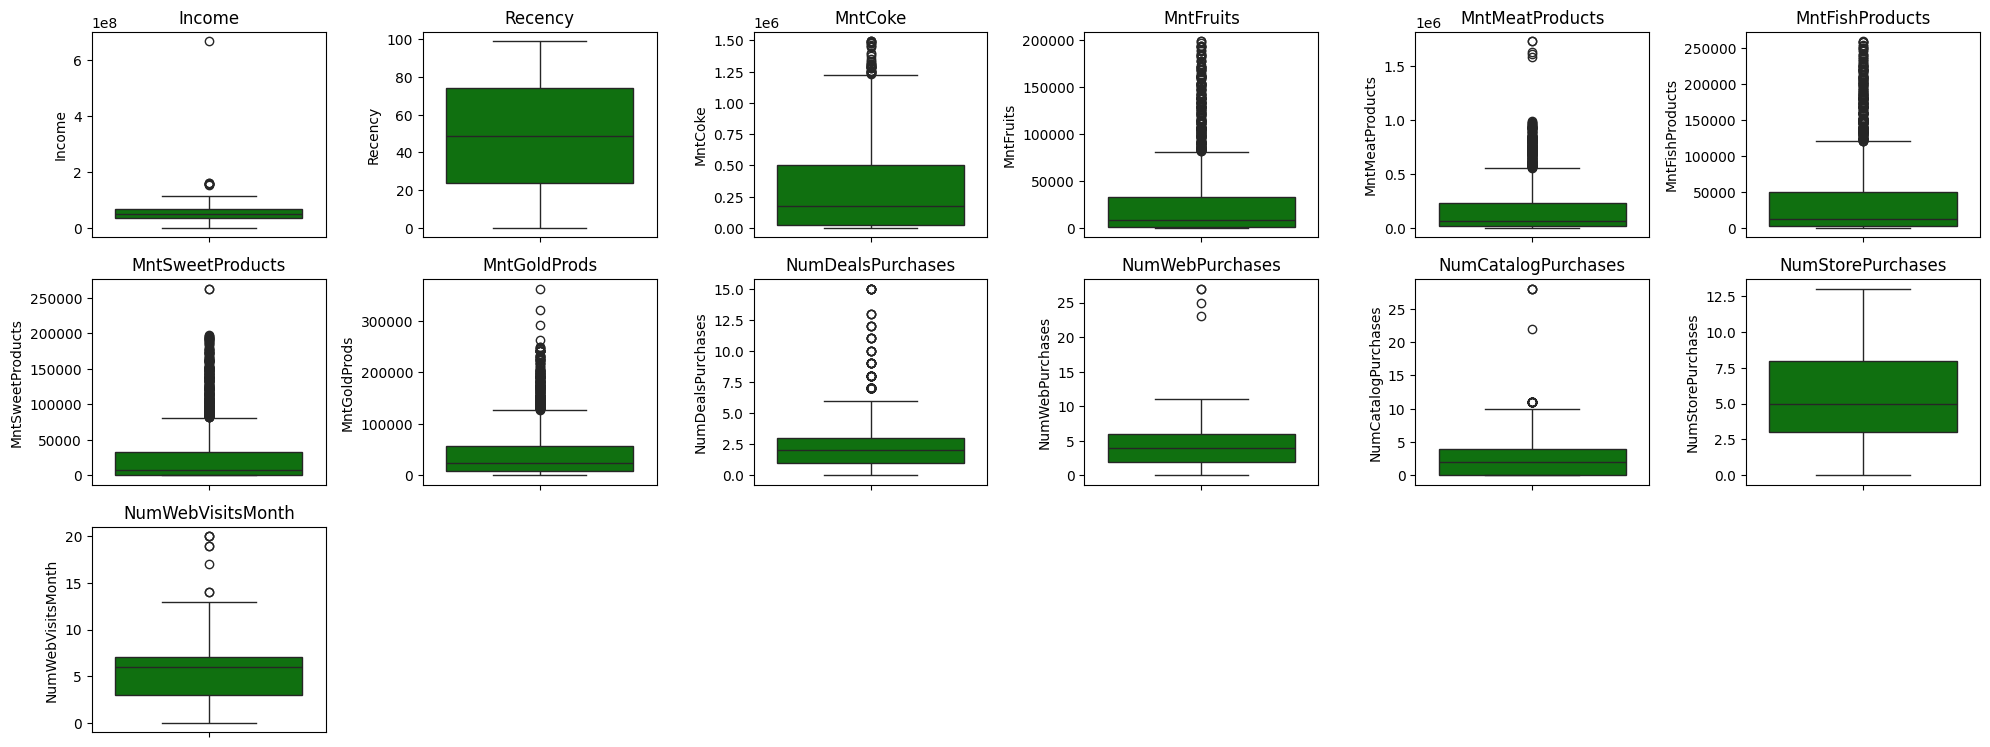

In [10]:
#bloxplot for numerical feature
numericals = ['Income', 'Recency', 'MntCoke', 'MntFruits',	'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
              'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
features = numericals
# Setting size of bloxplot
plt.figure(figsize=(20, 10))

# Creating subplot for each feature
for i in range(len(features)):
    plt.subplot(4, 6, i + 1)  # Setting bloxpot in grid 4x6
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.title(features[i])  # Adding title for each subplot

plt.tight_layout()  # Setting layout
plt.show()

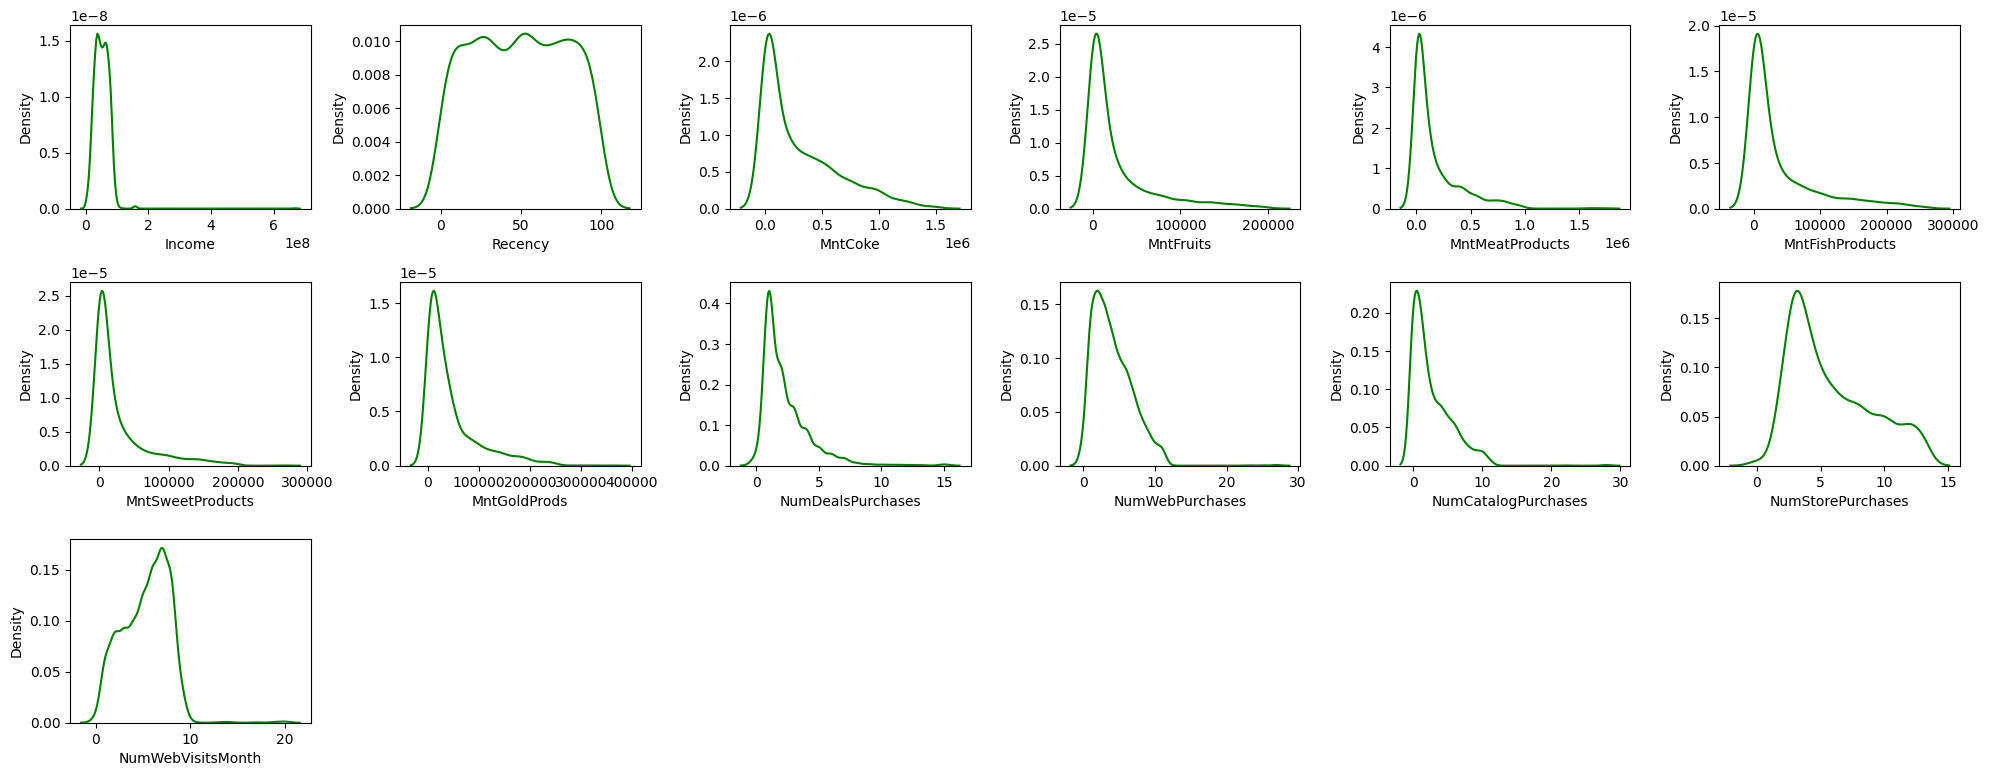

In [11]:
#Checking distribution of numerical feature
plt.figure(figsize=(20, 10)) #setting size

#create distplot
for i in range(len(features)):
  plt.subplot(4, 6, i + 1)
  sns.kdeplot(x=df[features[i]], color='green')
  plt.xlabel(features[i])

plt.tight_layout()
plt.show()

**Categorical Feature**

In [12]:
#showing value of cats
df[cats].describe()

,Education,Marital_Status
count,2240,2240
unique,5,6
top,S1,Menikah
freq,1127,864


In [13]:
#showing value of cats
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Education:
Education
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: count, dtype: int64

Value count kolom Marital_Status:
Marital_Status
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: count, dtype: int64



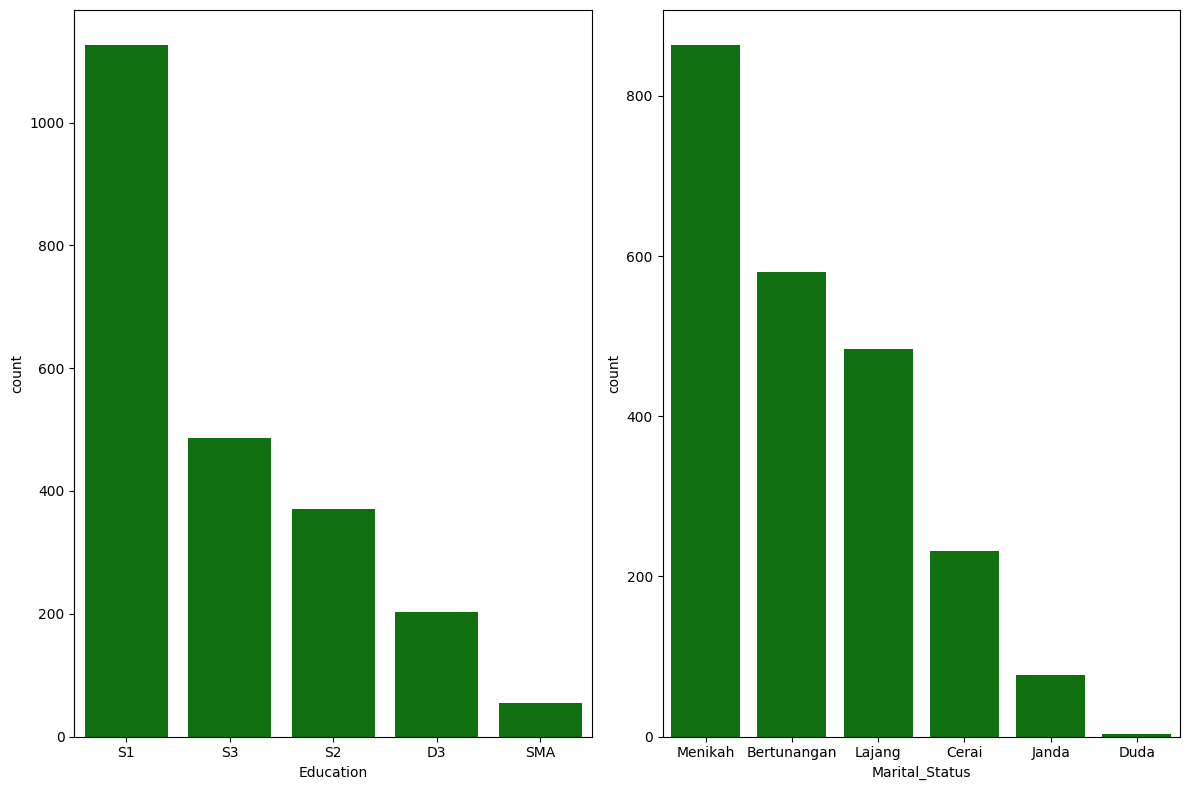

In [136]:
#Create plot for cats columns
features = cats
plt.figure(figsize=(12, 8))

for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  order = df[features[i]].value_counts().index #order data by DESC
  sns.countplot(x=df[features[i]], order=order, color='green')

plt.tight_layout()
plt.show()

Notes:

- The significant education of customers are bachelor degree
- Majority of customers's marital status are married

# **Multivariate Analysis**

# **TASK 1**

# **Feature Representative**

In [23]:
#feature engineering
#Conversion Rate
df['Conversion_Rate'] = df['Response']/df['NumWebVisitsMonth']

#number of children
df['total_children'] = df['Kidhome'] + df['Teenhome']

#number of transaction
df['total_transactions'] = df['NumDealsPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']

#number of expenditure
df['total_spending'] = df['MntCoke'] + df['MntFishProducts'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


In [24]:
#showing new column
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate,total_children,total_transactions,total_spending
877,10602,1983,S1,Menikah,39922000.0,1,0,2013-02-14,30,29000,...,0,0,0,3,11,0,0.000000,1,9,156000
1725,2634,1979,S2,Lajang,16653000.0,1,0,2014-04-18,10,5000,...,0,0,0,3,11,1,0.166667,1,9,69000
13,8180,1952,S2,Cerai,59354000.0,1,1,2013-11-15,53,233000,...,0,0,0,3,11,0,0.000000,2,15,310000
1611,1773,1978,D3,Menikah,12393000.0,0,0,2012-12-04,38,5000,...,0,0,0,3,11,0,0.000000,0,6,57000
1411,9121,1972,S1,Menikah,80134000.0,1,0,2013-05-20,40,1218000,...,1,0,0,3,11,1,0.166667,1,16,1690000


# **Age Categorization**

In [26]:
#Age Calculatiion.
df['age_cust'] = datetime.now().year - df['Year_Birth'] #Getting customers's age
df.sample(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate,total_children,total_transactions,total_spending,age_cust
82,5346,1973,D3,Menikah,23559000.0,1,0,2013-07-03,87,25000,...,0,0,3,11,0,0.0,1,9,79000,51
640,3856,1960,S1,Bertunangan,63381000.0,0,1,2012-10-05,78,571000,...,0,0,3,11,0,0.0,1,26,1005000,64


In [35]:
#Age categorization based on age clasification from Ministry of Health Republic Indonesia
bins = [19, 44, 59, 75, float('inf')]
labels = ['young', 'adult', 'old', 'oldest']

df['age_category'] = pd.cut(df['age_cust'], bins=bins, labels=labels, right=False)
df.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate,total_children,total_transactions,total_spending,age_cust,age_category
1585,1626,1973,S3,Cerai,35860000.0,1,1,2014-05-19,37,15000,...,0,3,11,1,0.2,2,6,49000,51,adult
1310,4603,1960,S3,Menikah,65695000.0,0,1,2014-01-31,50,371000,...,0,3,11,0,0.0,1,21,656000,64,old
1165,3598,1972,S1,Menikah,62710000.0,0,1,2013-05-23,53,441000,...,0,3,11,0,0.0,1,22,606000,52,adult


In [36]:
#to know range of age categories
age_and_category = df.groupby('age_category')['age_cust'].agg(['min', 'max'])
print(age_and_category)

              min  max
age_category          
young          28   43
adult          44   58
old            59   74
oldest         75  131


In [42]:
total_customers_category = df['age_category'].value_counts()
print(total_customers_category)

age_category
adult     995
old       750
young     385
oldest    110
Name: count, dtype: int64


<ipython-input-44-35c71dcc2cdc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_customers_category.index, y=total_customers_category.values, order=order, palette='summer')


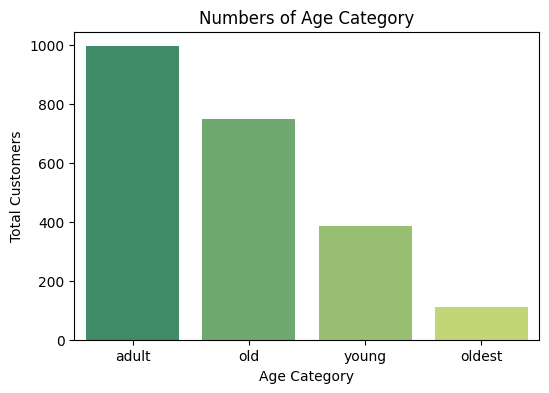

In [44]:
#Visualization of age category
#1. setting size
plt.figure(figsize=(6,4))

#2. Initiate plot types and data sources
order=total_customers_category.index
sns.barplot(x=total_customers_category.index, y=total_customers_category.values, order=order, palette='summer')

#3.Initiate plot title and label
plt.title('Numbers of Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Customers')

#4. show the plot
plt.show()

Notes:

The majority of customers are adult who aged 44-58 years old as many as 995 people, whereas the fewest customers are oldest, 110 people. Overall, the difference in the number of each customer more than 250 people.

**Conversion Rate Based on User Type**

In [49]:
conversion_category = df.groupby(['age_category'])['Conversion_Rate'].sum().reset_index()
print(conversion_category)

  age_category  Conversion_Rate
0        young        28.290873
1        adult        32.368651
2          old        27.365079
3       oldest         9.351190


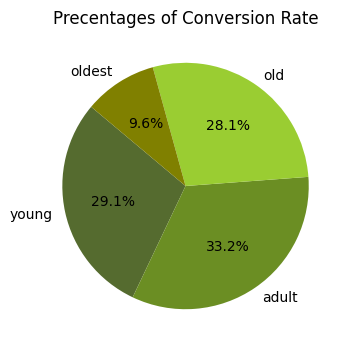

In [57]:
#visualization of conversion rate precentages for each age category
#1. Setting chart size
plt.figure(figsize=(6,4))

#initiate data source
colors = ['darkolivegreen', 'olivedrab', 'yellowgreen', 'olive']
plt.pie(conversion_category['Conversion_Rate'], labels=conversion_category['age_category'], autopct='%1.1f%%', startangle=140, colors=colors)

#adding title
plt.title('Precentages of Conversion Rate')

#Showing plot
plt.show()

The result of conversion rate proportion showed that the most potential customers to receive the campaign are adult (33.2%), meanwhile the oldest customers are very unlikely to accept the campaign. Moreover, the percentages of young and old customers to accept the campaign differs by 1%. Although the numbers of old customers greater than young customers, this does not mean that old customers will accept the campaign   

# **Income and Age Category**

In [67]:
#income Category based on quantile value
df['Income_Clasification'] = pd.qcut(df['Income'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Rendah', 'Sedang', 'Menengah', 'Tinggi'])
print(df['Income_Clasification'])

0       Menengah
1         Sedang
2         Tinggi
3         Rendah
4       Menengah
          ...   
2235    Menengah
2236    Menengah
2237    Menengah
2238      Tinggi
2239    Menengah
Name: Income_Clasification, Length: 2240, dtype: category
Categories (4, object): ['Rendah' < 'Sedang' < 'Menengah' < 'Tinggi']


In [68]:
#Showing range of income
Income_and_category = df.groupby('Income_Clasification')['Income'].agg(['min', 'max'])
print(Income_and_category)

                             min          max
Income_Clasification                         
Rendah                 1730000.0   35246000.0
Sedang                35322000.0   51373000.0
Menengah              51390000.0   68487000.0
Tinggi                68627000.0  666666000.0


In [69]:
#value count of income
df['Income_Clasification'].value_counts()

Income_Clasification
Rendah      554
Sedang      554
Menengah    554
Tinggi      554
Name: count, dtype: int64

In [77]:
#Conversion Rate based on income category
conversion_income = df.groupby(['Income_Clasification'])['Conversion_Rate'].sum().reset_index()
print(conversion_income)

  Income_Clasification  Conversion_Rate
0               Rendah         7.676587
1               Sedang         9.875000
2             Menengah        10.773810
3               Tinggi        68.050397


<function matplotlib.pyplot.show(close=None, block=None)>

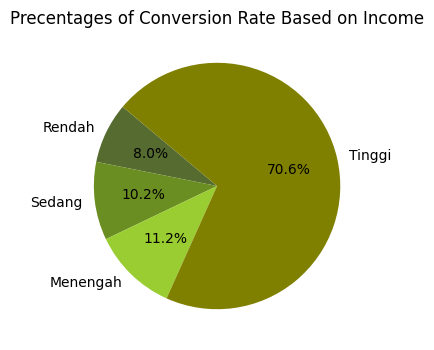

In [81]:
#visualization of conversion rate precentages for each income category
#1. Setting chart size
plt.figure(figsize=(6,4))

#initiate data source
colors = ['darkolivegreen', 'olivedrab', 'yellowgreen', 'olive']
plt.pie(conversion_income['Conversion_Rate'], labels=conversion_income['Income_Clasification'], autopct='%1.1f%%', startangle=140, colors=colors)

#adding title
plt.title('Precentages of Conversion Rate Based on Income')

#Showing plot
plt.show

In [74]:
#grouping age and income category
age_income_count = df.groupby(['age_category', 'Income_Clasification']).size().reset_index(name='count')

# Creating pivot table
pivot_table_age_income = age_income_count.pivot(index='age_category', columns='Income_Clasification', values='count').fillna(0)

print(pivot_table_age_income)

Income_Clasification  Rendah  Sedang  Menengah  Tinggi
age_category                                          
young                    162      77        38     103
adult                    279     266       237     205
old                      107     185       249     199
oldest                     6      26        30      47


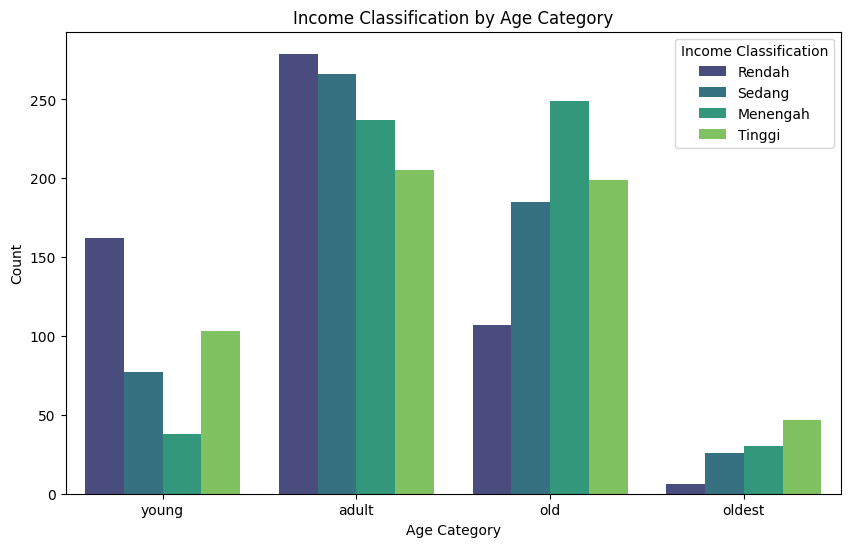

In [75]:
# Reset index for plotting
pivot_table_age_income = pivot_table_age_income.reset_index()

# Melt the DataFrame for seaborn
melted_df = pivot_table_age_income.melt(id_vars='age_category', value_vars=pivot_table_age_income.columns[1:], var_name='Income_Clasification', value_name='count')

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='age_category', y='count', hue='Income_Clasification', data=melted_df, palette='viridis')

# Adding titles and labels
plt.title('Income Classification by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Income Classification')
plt.show()

Pivot Table for Counts:
Income_Clasification  Rendah  Sedang  Menengah  Tinggi
age_category                                          
young                    162      77        38     103
adult                    279     266       237     205
old                      107     185       249     199
oldest                     6      26        30      47

Pivot Table for Conversion Rates:
Income_Clasification    Rendah    Sedang  Menengah     Tinggi
age_category                                                 
young                 2.210714  1.810714  1.319444  22.950000
adult                 4.850794  4.687302  2.868254  19.962302
old                   0.490079  2.525794  6.044444  18.304762
oldest                0.125000  0.851190  0.541667   6.833333


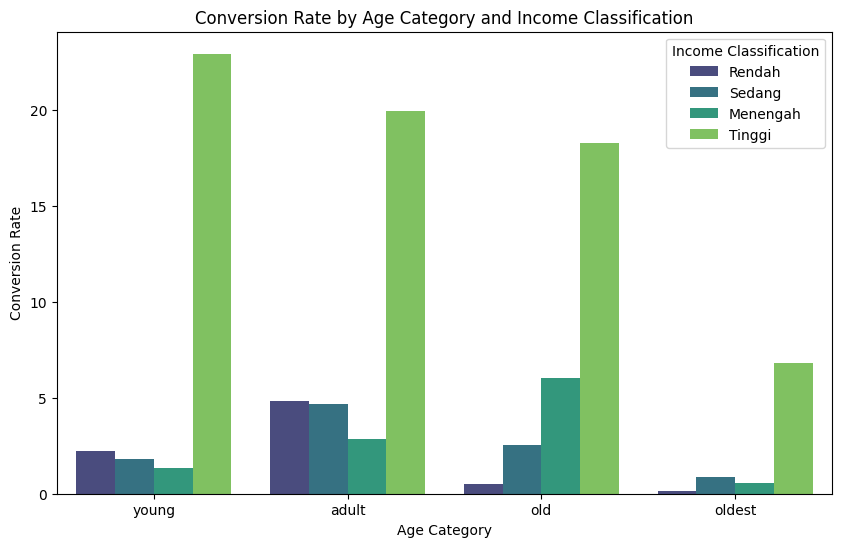

In [76]:
# Grouping age and income category and calculating counts and sum of conversion rates
age_income_conversion = df.groupby(['age_category', 'Income_Clasification']).agg({
    'Income_Clasification': 'size',
    'Conversion_Rate': 'sum'
}).rename(columns={'Income_Clasification': 'count'}).reset_index()

# Creating pivot table for counts
pivot_table_count = age_income_conversion.pivot(index='age_category', columns='Income_Clasification', values='count').fillna(0)

# Creating pivot table for conversion rates
pivot_table_conversion = age_income_conversion.pivot(index='age_category', columns='Income_Clasification', values='Conversion_Rate').fillna(0)

print("Pivot Table for Counts:")
print(pivot_table_count)

print("\nPivot Table for Conversion Rates:")
print(pivot_table_conversion)

# Reset index for plotting
pivot_table_conversion_reset = pivot_table_conversion.reset_index()

# Melt the DataFrame for seaborn
melted_df = pivot_table_conversion_reset.melt(id_vars='age_category', value_vars=pivot_table_conversion.columns, var_name='Income_Clasification', value_name='Conversion_Rate')

# Plotting bar chart for Conversion Rates
plt.figure(figsize=(10, 6))
sns.barplot(x='age_category', y='Conversion_Rate', hue='Income_Clasification', data=melted_df, palette='viridis')

# Adding titles and labels
plt.title('Conversion Rate by Age Category and Income Classification')
plt.xlabel('Age Category')
plt.ylabel('Conversion Rate')
plt.legend(title='Income Classification')
plt.show()

Notes:

Based on Income Classification, total customers indicate the same amount. Then, customers who have high incomes have the potential to accept the campaign. In addition, the campaign is most widely raccepted by young customers who have high incomes, up to more than 20

# **Spending, Age, and Income**

In [83]:
df['total_spending'].describe()

count    2.240000e+03
mean     6.057982e+05
std      6.022493e+05
min      5.000000e+03
25%      6.875000e+04
50%      3.960000e+05
75%      1.045500e+06
max      2.525000e+06
Name: total_spending, dtype: float64

In [87]:
print(df['total_spending'])

0       1617000
1         27000
2        776000
3         53000
4        422000
         ...   
2235    1341000
2236     444000
2237    1241000
2238     843000
2239     172000
Name: total_spending, Length: 2240, dtype: int64


In [113]:
#Spending Categirization
# Bins dan Labels yang benar

# Mengkategorikan pengeluaran berdasarkan bins
df['spending_category'] = pd.qcut(df['total_spending'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Rendah', 'Sedang', 'Menengah', 'Tinggi'])

# Menampilkan hasil
print(df['spending_category'].value_counts())

spending_category
Sedang      561
Rendah      560
Tinggi      560
Menengah    559
Name: count, dtype: int64


In [115]:
#Conversion Rate based on income category
conversion_spending = df.groupby(['spending_category'])['Conversion_Rate'].sum().reset_index()
print(conversion_spending)

  spending_category  Conversion_Rate
0            Rendah         4.405556
1            Sedang         9.234524
2          Menengah        14.525397
3            Tinggi        69.210317


<function matplotlib.pyplot.show(close=None, block=None)>

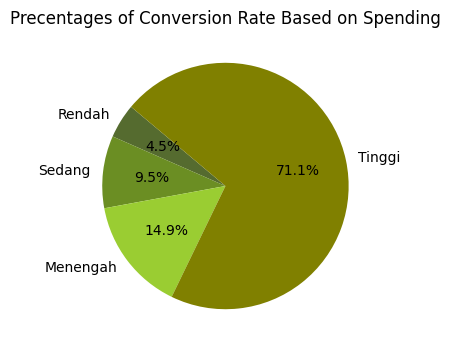

In [122]:
#visualization of conversion rate precentages for each spending category
#1. Setting chart size
plt.figure(figsize=(6,4))

#initiate data source
colors = ['darkolivegreen', 'olivedrab', 'yellowgreen', 'olive']
plt.pie(conversion_spending['Conversion_Rate'], labels=conversion_spending['spending_category'], autopct='%1.1f%%', startangle=140, colors=colors)

#adding title
plt.title('Precentages of Conversion Rate Based on Spending')

#Showing plot
plt.show

Notes:

The campaign mostly accepted by customers who have high expenditure

In [128]:
#hubungan income dan spending
from scipy.stats import chi2_contingency
# Crosstab untuk melihat hubungan
cross_tab = pd.crosstab(df['Income_Clasification'], df['spending_category'])

# Uji chi-square
chi2, p, dof, expected = chi2_contingency(cross_tab)

print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p}')

Chi-square statistic: 2007.474945361059
p-value: 0.0


In [131]:
correlation = df['Income'].corr(df['total_spending'])

print(f'Koefisien Korelasi Pearson: {correlation}')

Koefisien Korelasi Pearson: 0.6675760903888281


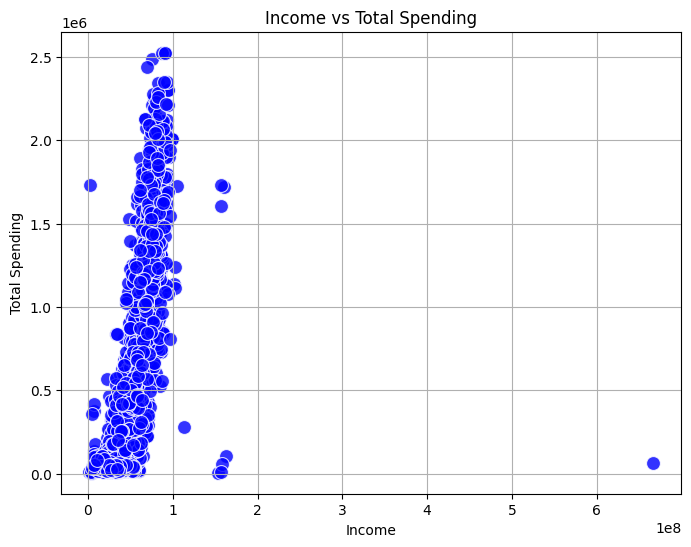

In [132]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='total_spending', data=df, color='b', s=100, alpha=0.8)
plt.title('Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()

notes:

- r = 0.6675760903888281 indicates a moderately strong positive correlation between the two variables. This means that there is a tendency for the two variables to increase (or decrease) together in a linear fashion. However, the correlation is not perfect, suggesting that there is some variability in the relationship and other factors may also influence the values

- General Trend: There is a positive correlation between income and total spending. This means that as income increases, total spending generally also increases.

In [133]:
#Spending and age category
age_spending_count = df.groupby(['age_category', 'spending_category']).size().reset_index(name='count')

# Creating pivot table
pivot_table_age_spending = age_spending_count.pivot(index='age_category', columns='spending_category', values='count').fillna(0)

print(pivot_table_age_spending)

spending_category  Rendah  Sedang  Menengah  Tinggi
age_category                                       
young                 127      97        55     106
adult                 285     268       233     209
old                   137     178       237     198
oldest                 11      18        34      47


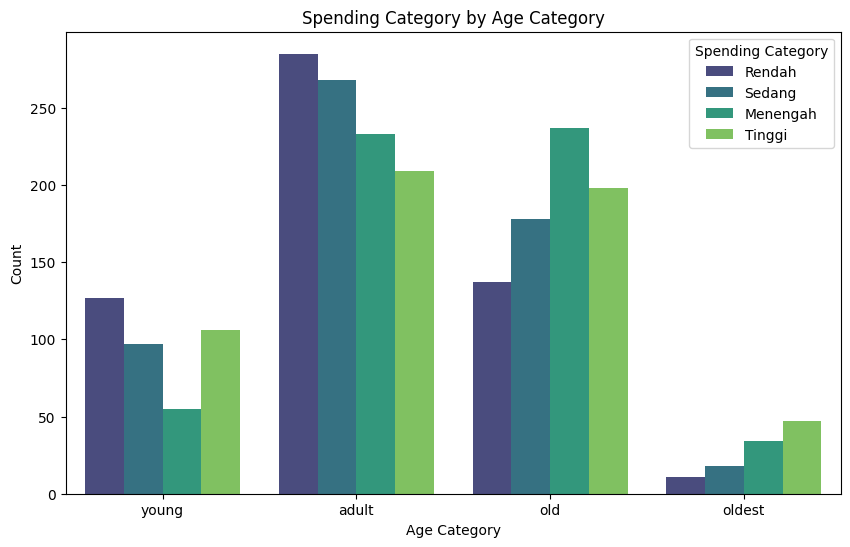

In [134]:
# Reset index for plotting
pivot_table_age_spending = pivot_table_age_spending.reset_index()

# Melt the DataFrame for seaborn
melted_df = pivot_table_age_spending.melt(id_vars='age_category', value_vars=pivot_table_age_income.columns[1:], var_name='spending_category', value_name='count')

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='age_category', y='count', hue='spending_category', data=melted_df, palette='viridis')

# Adding titles and labels
plt.title('Spending Category by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Spending Category')
plt.show()

based on age categories, Young and Adult customres those with low expenses are more numerous than others. Meanwhile, spending old customers tend to in 'menengah' level. and the oldest customers dominate in high level expenses.

In [123]:
#grooupng age, income, and spending
age_income_spending = df.groupby(['age_category', 'Income_Clasification', 'spending_category']).agg({
    'Income_Clasification': 'size',
    'Conversion_Rate': 'sum'
}).rename(columns={'Income_Clasification': 'count'}).reset_index()

# Pivot table for counts (considering spending_category)
pivot_table_count_spending = age_income_spending.pivot(index='age_category', columns=['Income_Clasification', 'spending_category'], values='count').fillna(0)

# Pivot table for conversion rates (considering spending_category)
pivot_table_conversion_spending = age_income_spending.pivot(index='age_category', columns=['Income_Clasification', 'spending_category'], values='Conversion_Rate').fillna(0)

# Print or use the pivot tables as needed
print(pivot_table_count_spending)
print(pivot_table_conversion_spending)

Income_Clasification Rendah                        Sedang                  \
spending_category    Rendah Sedang Menengah Tinggi Rendah Sedang Menengah   
age_category                                                                
young                   108     51        3      0     16     44       17   
adult                   184     90        4      1     87    130       45   
old                      66     36        5      0     64     82       36   
oldest                    6      0        0      0      3     16        7   

Income_Clasification        Menengah                        Tinggi         \
spending_category    Tinggi   Rendah Sedang Menengah Tinggi Rendah Sedang   
age_category                                                                
young                     0        0      2       16     20      0      0   
adult                     4       10     42      132     53      3      3   
old                       3        4     53      134     58      0      4  

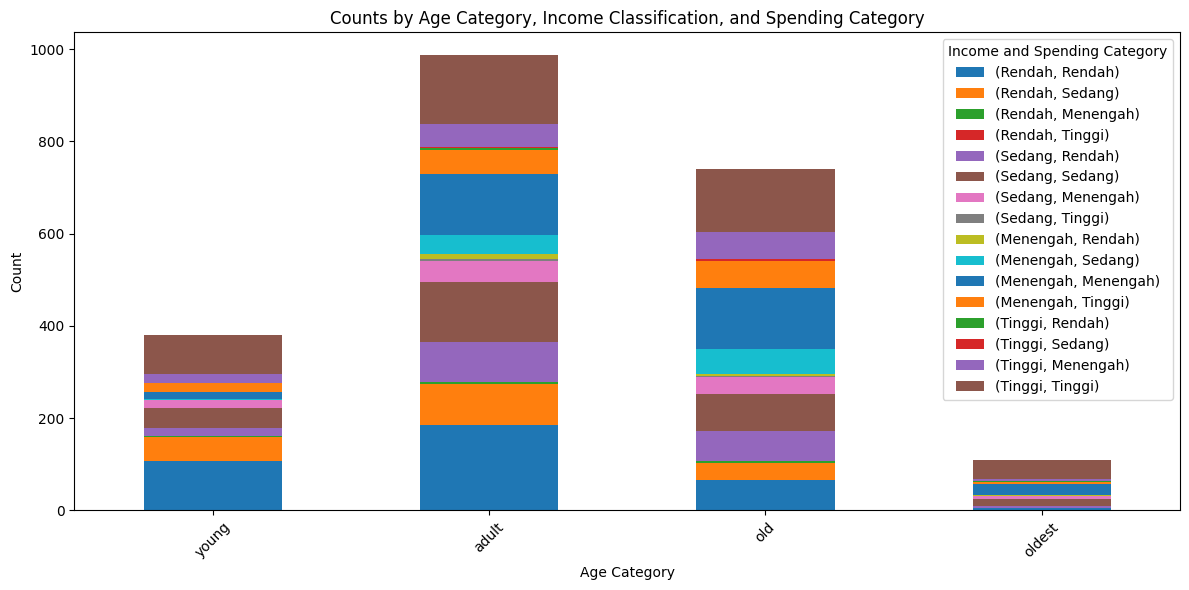

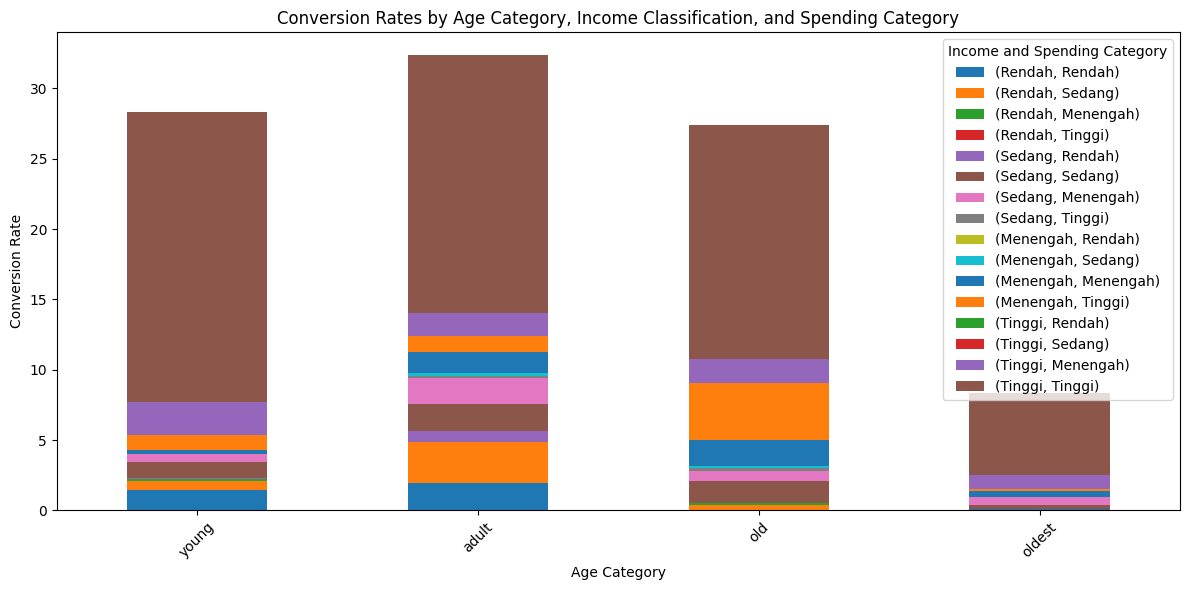

In [126]:
# Plotting bar chart for count
plt.figure(figsize=(12, 6))
pivot_table_count_spending.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Counts by Age Category, Income Classification, and Spending Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income and Spending Category')
plt.tight_layout()
plt.show()

# Plotting bar chart for conversion rate
plt.figure(figsize=(12, 6))
pivot_table_conversion_spending.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Conversion Rates by Age Category, Income Classification, and Spending Category')
plt.xlabel('Age Category')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Income and Spending Category')
plt.tight_layout()
plt.show()

Overall, Customers that have high income and expense tend to accept the campaign. For this case, to increase the number acceptance of the campaign, I guess to evaluate type of campaign and reformulate a new campaign related to customers age and income.